# Signals and Systems for Dummies, Chapter 5

## Convolving rectangular/triangular pulses

In [62]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [10]:
def create_rect_pulse(amp, offset, tau, t):
    """
    r = amp*pi((t-offset)/tau)

    """
    r = np.zeros_like(t)
    r[(t > offset-tau/2) & (t <= offset+tau/2)] = amp
    return r

In [45]:
step = 0.005
t = np.arange(0, 10, step)
x = create_rect_pulse(2, 3.5, 1, t)
# x = create_rect_pulse(2, 3.5, 1, t)*(t-3)
h = create_rect_pulse(1, 1, 2, t)
c = signal.convolve(x, h, method="direct")*step

Text(0.5, 1.0, 'Finite Extent Signal - Convolution Example')

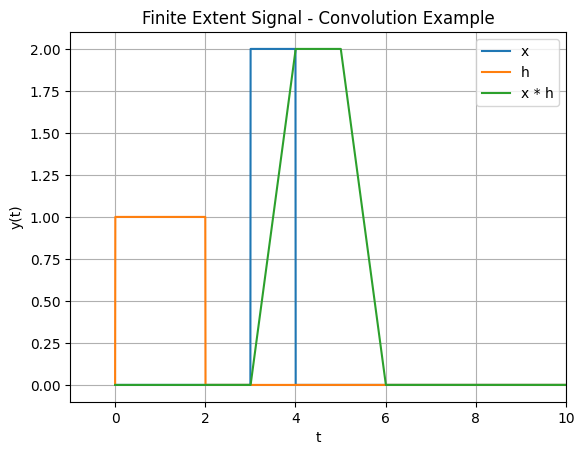

In [ ]:
fig, ax = plt.subplots(dpi=150)
ax.plot(t, x, label="x")
ax.plot(t, h, label="h")
t_c = np.arange(0, step*len(c), step)
t_c = t_c[:len(c)]
ax.plot(t_c, c, label="x * h")
ax.grid()
ax.legend()
ax.set_xlim(right=10)
ax.set_ylabel("y(t)")
ax.set_xlabel("t")
ax.set_title("Finite Extent Signal - Convolution Example")

## Convolving with exponential decay

In [47]:
step = 0.005
t = np.arange(0, 20, step)
h = np.exp(-1*t)
T = 1
x1 = create_rect_pulse(1, T/2, T, t)
c1 = signal.convolve(x1, h, method="direct")*step
T = 5
x2 = create_rect_pulse(1, T/2, T, t)
c2 = signal.convolve(x2, h, method="direct")*step
T = 10
x3 = create_rect_pulse(1, T/2, T, t)
c3 = signal.convolve(x3, h, method="direct")*step

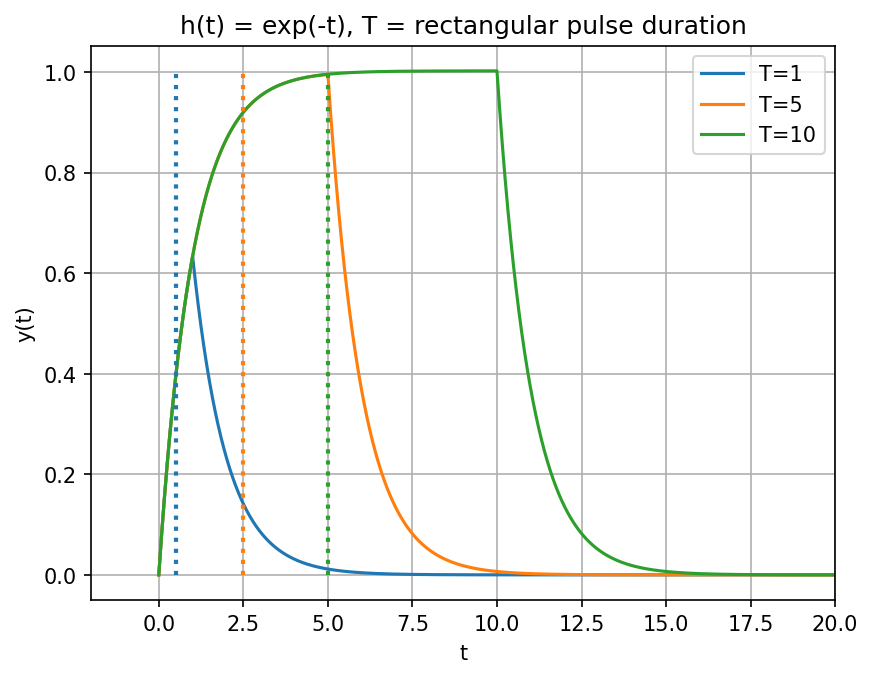

In [ ]:
fig, ax = plt.subplots(dpi=150)
t_c = np.arange(0, step*len(c1), step)
t_c = t_c[:len(c1)]
ax.plot(t_c, c1, label="T=1")
ax.plot(t_c, c2, label="T=5")
ax.plot(t_c, c3, label="T=10")
ax.set_xlim(right=20)
ax.grid()
ax.legend()
ax.set_ylabel("y(t)")
ax.set_xlabel("t")
ax.set_title("h(t) = exp(-t), T = rectangular pulse duration")
colors = rcParams["axes.prop_cycle"].by_key()["color"]
ax.vlines([0.5, 2.5, 5], ymin=0, ymax=1, colors=colors[:3], linestyles="dotted", linewidth=2)

## Convolving sinusoid and rectangular pulse

In [74]:
step = 0.001
t = np.arange(0, 20, step)
T = 3/4
h = create_rect_pulse(1/T, T/2, T, t)
x = np.sin(2*np.pi*t)
c = signal.convolve(x, h, method="direct")*step

Text(0.5, 1.0, 'Sinusoid * Rectangle Pulse')

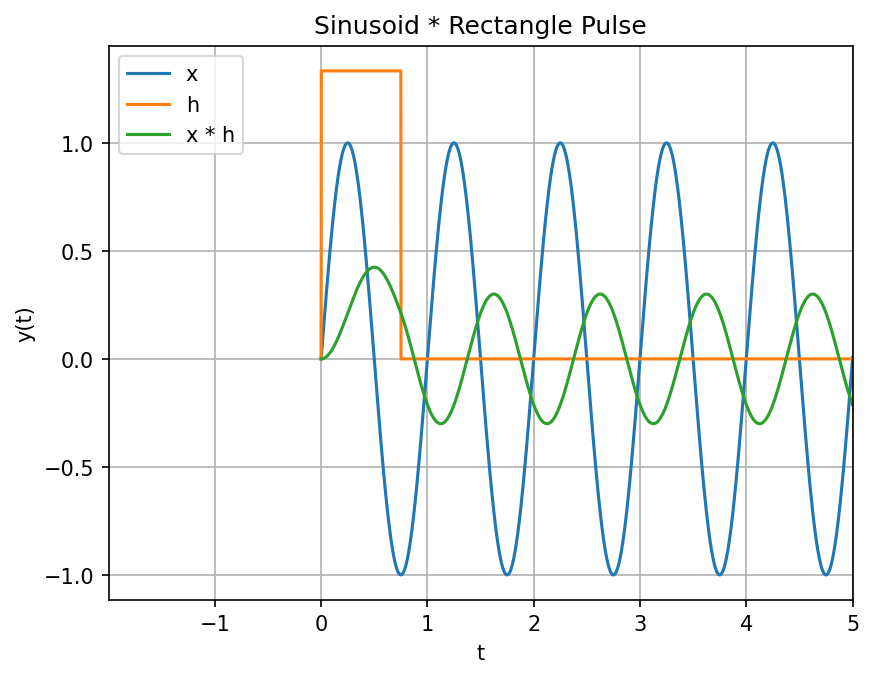

In [76]:
fig, ax = plt.subplots(dpi=150)
t_c = np.arange(0, step*len(c), step)
t_c = t_c[:len(c)]
ax.plot(t, x, label="x")
ax.plot(t, h, label="h")
ax.plot(t_c, c, label="x * h")
ax.set_xlim(right=5)
ax.grid()
ax.legend()
ax.set_ylabel("y(t)")
ax.set_xlabel("t")
ax.set_title("Sinusoid * Rectangle Pulse")